<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_CoLab_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Data

In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 69kB/s 
     |████████████████████████████████| 3.1MB 45.6MB/s 
     |████████████████████████████████| 501kB 2.8MB/s 


In [0]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
tf.__version__

'2.0.0-beta1'

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
print (np.max (X_train))
print (np.max (X_test))

255
255


In [14]:
X_train = X_train / np.max (X_train)
X_test = X_test / np.max (X_test)
X_train.shape

(60000, 28, 28)

# Model

In [0]:
M, N, D = X_train.shape

In [0]:
layers_multi =  [tf.keras.layers.Flatten (input_shape=(D,D)),
                 tf.keras.layers.Dense (256, activation='relu'),
                 tf.keras.layers.Dropout (0.2),
                 tf.keras.layers.Dense (128, activation='relu'),
                 tf.keras.layers.Dropout (0.2),
                 tf.keras.layers.Dense (10, activation='softmax')]

In [0]:
multi = tf.keras.models.Sequential (layers_multi)

In [0]:
adam = tf.keras.optimizers.Adam (learning_rate=0.005, decay=1e-5)

In [0]:
multi.compile (optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [0]:
%%capture
m = multi.fit (X_train, y_train, validation_data=(X_test, y_test), epochs=100)

In [32]:
print ('Training Set Evaluation : ' + str(multi.evaluate (X_train, y_train)))
print ('Test Set Evaluation : ' + str(multi.evaluate (X_test, y_test)))

60000/60000 [==============================] - 3s 55us/sample - loss: 0.0023 - accuracy: 0.9993
Training Set Evaluation : [0.002333684907135527, 0.9992833]
10000/10000 [==============================] - 1s 57us/sample - loss: 0.0970 - accuracy: 0.9821
Test Set Evaluation : [0.09695962129197287, 0.9821]


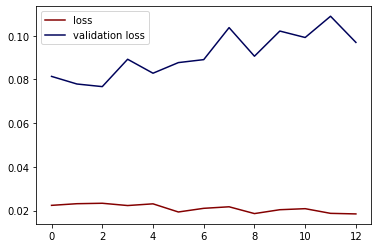

In [33]:
plt.plot (m.history['loss'], label='loss', color='#840000')
plt.plot (m.history['val_loss'], label='validation loss', color='#00035b')
plt.legend ()

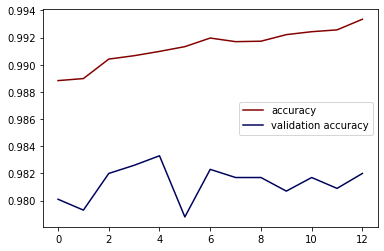

In [30]:
plt.plot (m.history['accuracy'], label='accuracy', color='#840000')
plt.plot (m.history['val_accuracy'], label='validation accuracy', color='#00035b')
plt.legend ()